<a href="https://colab.research.google.com/github/estiven322M/Algoritmo-de-agrupamiento-no-supervisado-K-Means-con-python/blob/main/Actividad_AA2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# --- Instalar librer√≠as necesarias---

import pandas as pd # importar libreria pandas con alias "pd"
import matplotlib.pyplot as plt # importar m√≥dulo pyplot de la libreria matplotib con alias "plt"
import seaborn as sns # importar libreria seaborn con alias "sns"
import numpy as np # importar Numpy para calculo numerico para operar sobre arrays y matrices
import kagglehub # importar Kagglehub plataforma de data science para descargar datasets
# ---importar scipy para computaci√≥n cientifica---
# modulo stats (estadisticas)
# importando la funcion 'mode' para encontrar valores que mas se repiten
from scipy.stats import mode
# --- importar libreria Scikit-learn, para Machine Learning en Python
from sklearn.preprocessing import StandardScaler
# --- importar m√≥dulo completo de estad√≠sticas de la librer√≠a SciPy
# --- para pruebas estad√≠sticas, y distribuciones de probabilidad
from scipy import stats
# ---comando de IPython
# para  que los gr√°ficos generados por Matplotlib o Seaborn
# se muestren directamente en la celda de salida del notebook.
%matplotlib inline
from kagglehub import KaggleDatasetAdapter

# Ruta
ruta_archivo = "Iris.csv"

# Cargar datos con la funcion load()
dataframe= kagglehub.dataset_load(
  KaggleDatasetAdapter.PANDAS,
  "saurabh00007/iriscsv",
  ruta_archivo

)

print("primeros 5 registros:", dataframe.head())
# Obtener medidas de las longitudes
dataframe['PetalLengthCm'].mean()
dataframe['PetalLengthCm'].std()
dataframe['PetalLengthCm'].min()
dataframe['PetalLengthCm'].max()

# Obtener estad√≠sticos descriptivos
dataframe.describe()

Using Colab cache for faster access to the 'iriscsv' dataset.
primeros 5 registros:    Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000

Para realizar la exploraci√≥n de los datos se usar√°n gr√°ficos como: el diagrama de dispersio√≥n y el diagrama de pares (diagrama de cajas y bigotes) para obser la variable categ√≥rica especies (species) y su variaci√≥n de longitudes y anchos de los s√°palos (**petal_length, petal_width**) y p√©talos (**sepal_length, sepal_width**) para cada especie. Con este diagrama se puede comparar la variaci√≥n de datos entre las diferentes especies.

In [3]:
var = 'Species'

datosLongitudSepalo = pd.concat([dataframe['SepalLengthCm'], dataframe[var]], axis=1)
datosAnchoSepalo = pd.concat([dataframe['SepalWidthCm'], dataframe[var]], axis=1)
datosLongitudPetalo = pd.concat([dataframe['PetalLengthCm'], dataframe[var]], axis=1)
datosAnchoPetalo = pd.concat([dataframe['PetalWidthCm'], dataframe[var]], axis=1)

print(datosLongitudSepalo.head(5))
print(datosAnchoSepalo.head(5))
print(datosLongitudPetalo.head(5))
print(datosAnchoPetalo.head(5))

   SepalLengthCm      Species
0            5.1  Iris-setosa
1            4.9  Iris-setosa
2            4.7  Iris-setosa
3            4.6  Iris-setosa
4            5.0  Iris-setosa
   SepalWidthCm      Species
0           3.5  Iris-setosa
1           3.0  Iris-setosa
2           3.2  Iris-setosa
3           3.1  Iris-setosa
4           3.6  Iris-setosa
   PetalLengthCm      Species
0            1.4  Iris-setosa
1            1.4  Iris-setosa
2            1.3  Iris-setosa
3            1.5  Iris-setosa
4            1.4  Iris-setosa
   PetalWidthCm      Species
0           0.2  Iris-setosa
1           0.2  Iris-setosa
2           0.2  Iris-setosa
3           0.2  Iris-setosa
4           0.2  Iris-setosa


**Graficar boxplot**

/tmp/ipython-input-2845626652.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=var, y='SepalLengthCm', data=datosLongitudSepalo, palette=['blue','orange','green']) # se dibuja el boxplot
/tmp/ipython-input-2845626652.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=var, y='SepalWidthCm', data=datosAnchoSepalo, palette=['blue','orange','green']) # se dibuja el boxplot
/tmp/ipython-input-2845626652.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=var, y='PetalLengthCm', data=datosLongitudPetalo, palette=['blue','orange','green'

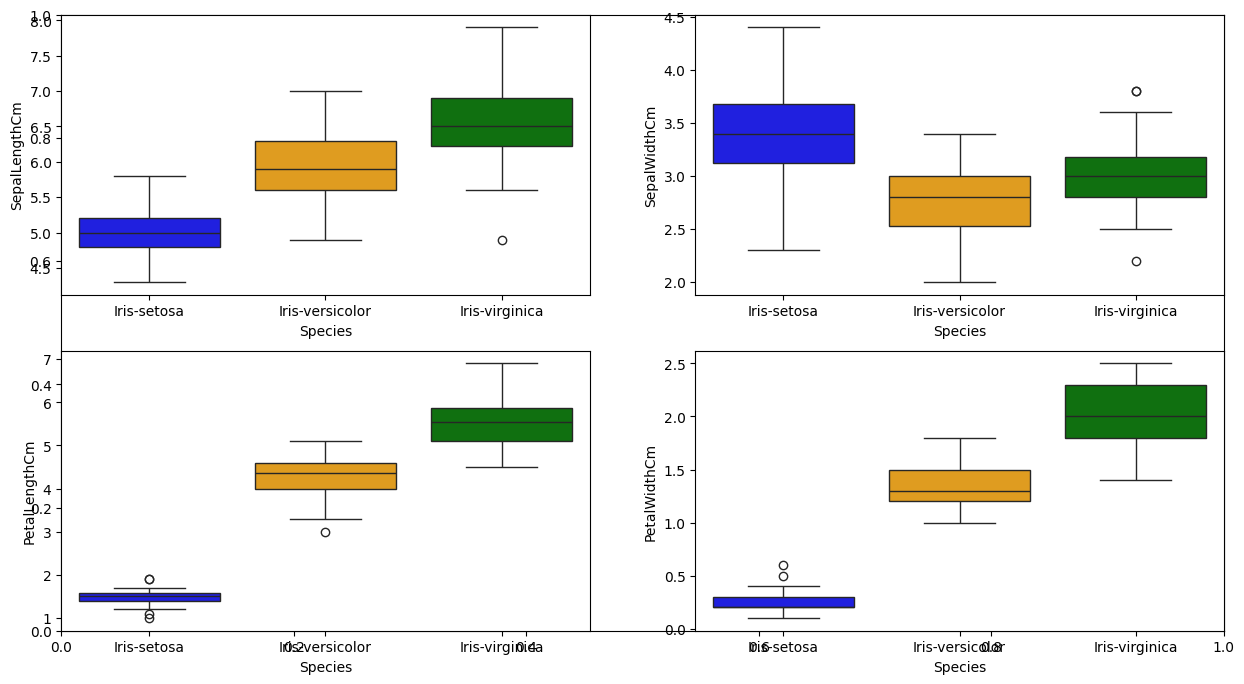

In [4]:
f, ax=plt.subplots(figsize=(15,8)) # √°rea para graficar

plt.subplot(2,2,1) # definir posici√≥n para primer gr√°fico
sns.boxplot(x=var, y='SepalLengthCm', data=datosLongitudSepalo, palette=['blue','orange','green']) # se dibuja el boxplot

plt.subplot(2,2,2) # definir posici√≥n para segundo gr√°fico
sns.boxplot(x=var, y='SepalWidthCm', data=datosAnchoSepalo, palette=['blue','orange','green']) # se dibuja el boxplot

plt.subplot(2,2,3) # definir posici√≥n para tercer gr√°fico
sns.boxplot(x=var, y='PetalLengthCm', data=datosLongitudPetalo, palette=['blue','orange','green']) # se dibuja el boxplot

plt.subplot(2,2,4) # definir posici√≥n para cuarto gr√°fico
sns.boxplot(x=var, y='PetalWidthCm', data=datosAnchoPetalo, palette=['blue','orange','green']) # se dibuja el boxplot

plt.show()


**Especie Iris-setosa** (azul): Esta especie es claramente distinta a las otras dos. Se caracteriza por tener la menor longitud de s√©palo (SepalLengthCm) pero, a su vez, la mayor anchura de s√©palo (SepalWidthCm). Esta combinaci√≥n la hace √∫nica.

**Especies Iris-versicolor** (naranja) y Iris-virginica (verde): La diferencia entre estas dos especies es menos evidente si solo observamos el s√©palo.

**Longitud del S√©palo**: Iris-virginica tiende a tener s√©palos m√°s largos que Iris-versicolor, aunque existe una superposici√≥n en sus valores.

*Ancho del S√©palo*: Sus anchos de s√©palo son muy similares, con rangos que tambi√©n se superponen de manera significativa.

***Conclusi√≥n general sobre los P√©talos***: La diferencia m√°s notable entre las tres especies se observa en las dimensiones de los p√©talos. Iris-setosa tiene un p√©talo mucho m√°s corto y angosto que las otras dos, sin ninguna superposici√≥n. Los p√©talos son, por tanto, el rasgo m√°s distintivo entre las especies en este conjunto de datos.

#  Uso de Scatter Plot o Diagrama de Dispersi√≥n  

El **Scatter Plot** o **diagrama de dispersi√≥n** es una herramienta gr√°fica fundamental para visualizar la relaci√≥n entre **dos variables num√©ricas** dentro de un conjunto de datos (*DataFrame*).  

---

## ¬øQu√© muestra?  
Este diagrama representa cada observaci√≥n como un **punto en un plano cartesiano**, permitiendo analizar visualmente la **correlaci√≥n entre las variables**:  

- **Relaci√≥n Fuerte**  
  Los puntos forman un patr√≥n claro y definido (por ejemplo, una l√≠nea ascendente o descendente).  

- **Relaci√≥n D√©bil**  
  Los puntos est√°n m√°s esparcidos, pero a√∫n se puede intuir una tendencia.  

- **Independencia**  
  Los puntos no muestran ning√∫n patr√≥n aparente, sugiriendo que no hay una relaci√≥n clara entre las variables.  

---

**Conclusi√≥n:** El diagrama de dispersi√≥n es una herramienta clave en el **an√°lisis exploratorio de datos (EDA)**, ya que facilita la identificaci√≥n de tendencias, correlaciones y posibles outliers.  





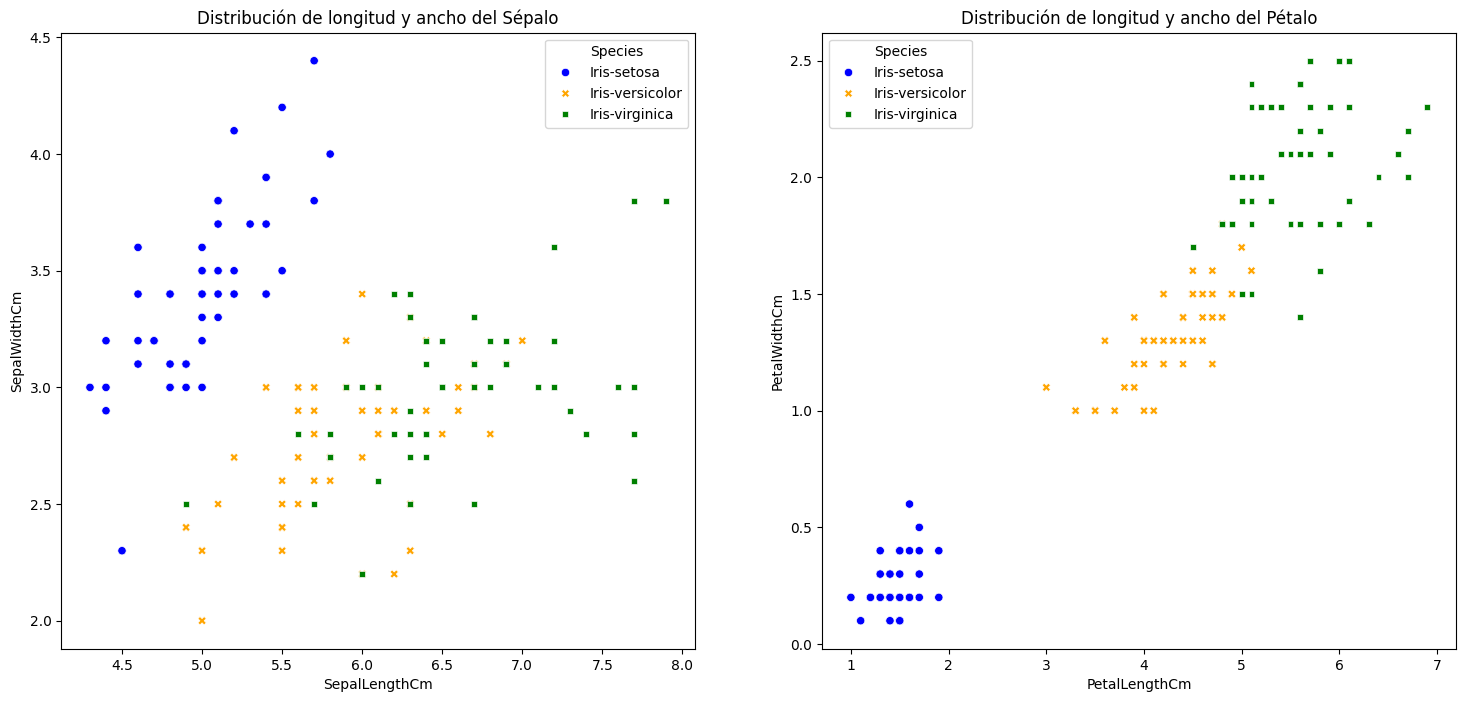

In [5]:
# --- Crear la figura y los ejes (subplots)
figura, axes = plt.subplots(1,2, figsize=(18,8))


# --- Graficar en el primer subplot (axes[0])
sns.scatterplot(
    data=dataframe,
    x='SepalLengthCm',
    y='SepalWidthCm',
    hue=var,
    style=var,
    palette=['blue','orange','green'],
    ax=axes [0]
)
axes[0].set_title('Distribuci√≥n de longitud y ancho del S√©palo')

# --- Graficar en el segundo subplot (axes[1])
sns.scatterplot(
    data=dataframe,
    x='PetalLengthCm',
    y='PetalWidthCm',
    hue=var,
    style=var,
    palette=['blue','orange','green'],
    ax=axes[1]
)
axes[1].set_title('Distribuci√≥n de longitud y ancho del P√©talo')

plt.show()

# Conclusiones

---

## 1. Las dimensiones del P√©talo son mejores para distinguir especies  
El hallazgo m√°s importante es que las medidas del **p√©talo (largo y ancho)** son mucho m√°s efectivas para diferenciar entre las tres especies que las medidas del **s√©palo**.  

-  **Gr√°fico de p√©talos (derecha):** los tres grupos de especies est√°n **muy bien definidos y separados**.  
-  **Gr√°fico de s√©palos (izquierda):** los grupos de *Iris-versicolor* e *Iris-virginica* se **superponen considerablemente**, dificultando su clasificaci√≥n usando solo estas dos caracter√≠sticas.  

---

## 2. Caracter√≠sticas √∫nicas de cada especie  

- **Iris-setosa (azul):**  
  - Es la especie m√°s f√°cil de identificar.  
  - Tiene los p√©talos m√°s peque√±os y aparece completamente **aislada** de las otras dos en el gr√°fico de p√©talos.  
  - Sus s√©palos tienden a ser **anchos pero no muy largos**.  

- **Iris-versicolor (naranja):**  
  - Ocupa una posici√≥n intermedia.  
  - Sus p√©talos y s√©palos son de tama√±o **mediano**, m√°s grandes que los de *setosa* pero m√°s peque√±os que los de *virginica*.  

- **Iris-virginica (verde):**  
  - Tiene los p√©talos **m√°s grandes** (en largo y ancho).  
  - Sus s√©palos tambi√©n tienden a ser los **m√°s largos**.  

---

## 3. Fuerte correlaci√≥n positiva en los P√©talos  
En las tres especies, pero especialmente en **versicolor** y **virginica**, se observa una **fuerte correlaci√≥n positiva** entre la **longitud y el ancho del p√©talo**.  

 Esto significa que:  
- A medida que el p√©talo se hace **m√°s largo**, tambi√©n se hace **m√°s ancho**.  
- Esta relaci√≥n es **menos clara** en las dimensiones del s√©palo.  

---


#  Refinamiento del algoritmo de agrupaci√≥n  

La **agrupaci√≥n de datos (clustering)** es un m√©todo de **clasificaci√≥n no supervisada** cuyo objetivo es encontrar **patrones ocultos** en un conjunto de datos y organizarlos en grupos llamados **cl√∫steres**.  

Este enfoque se utiliza en √°reas como la **detecci√≥n de anomal√≠as**, la **medicina**, la **biolog√≠a**, la **astronom√≠a**, la **industria** y muchas m√°s.  

---

##  Algoritmo K-Means  
Uno de los m√©todos m√°s usados es **K-Means (K-medias)** debido a su **simplicidad** y **facilidad de implementaci√≥n**.  

**Ventajas:**  
- Ofrece buenos resultados en muchos casos.  
- Es eficiente y r√°pido en datasets medianos.  

 **Desventajas:**  
- Tiene dificultades para identificar cl√∫steres **no esf√©ricos** o de **tama√±os muy diferentes**.  
- Es sensible al **ruido** y a **datos at√≠picos**.  
- Requiere definir el n√∫mero de cl√∫steres (**k**) y depende de la **inicializaci√≥n aleatoria de centroides**.  

---

##  Implementaci√≥n con Scikit-learn  
Con el dataset **Iris**, se puede aplicar **K-Means** para agrupar los datos y descubrir patrones.  

Las variables utilizadas ser√°n:  
- `sepal_length` (longitud del s√©palo)  
- `sepal_width` (ancho del s√©palo)  
- `petal_length` (longitud del p√©talo)  
- `petal_width` (ancho del p√©talo)  

Ejemplo de importaci√≥n en Python:  

```python
from sklearn.cluster import KMeans


In [6]:
# --- Crear una lista que contiene los √≠ndice (etiquetas) seleccionados del dataframe
indice_muestra=[30, 51, 120]

# --- Crear DataFrame
# --- Se utiliza el metodo .loc[] para seleccionar filas del dataframe basandose en las etiquetas definidas (indices)
muestras=pd.DataFrame(dataframe.loc[indice_muestra], columns=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'])
muestras # nombre del DataFrame

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
30             4.8           3.1            1.6           0.2
51             6.4           3.2            4.5           1.5
120            6.9           3.2            5.7           2.3

In [7]:
# --- Eliminar filas indicadas en las etiquetas
# Especificar con axis=0 el eje del cual se eliminan los datos, axis=0 se refiere a las filas (indices)
dataframe=dataframe.drop(indice_muestra, axis=0)

#  Preparaci√≥n de los Datos para K-Means  

En **aprendizaje no supervisado**, como en el caso del algoritmo **K-Means**, no se trabaja con una variable dependiente (*Y*).  
En su lugar, se utilizan √∫nicamente las **variables independientes** (*X*), que contienen las caracter√≠sticas del dataset.  

---

##  Definici√≥n de `X`  
En el dataset **Iris**, se seleccionan las columnas que representan:  

- `sepal_length` (longitud del s√©palo)  
- `sepal_width` (ancho del s√©palo)  
- `petal_length` (longitud del p√©talo)  
- `petal_width` (ancho del p√©talo)  

Esto se logra usando la funci√≥n `.iloc[]` de **pandas**, que permite seleccionar filas y columnas por su posici√≥n:  

```python
# Selecci√≥n de las 4 primeras columnas del dataset iris_df
X = iris_df.iloc[:, [0, 1, 2, 3]].values


In [8]:
# --- Seleccionar todas las filas y las colomnas de √≠ndice de 0 a 3
# --- la funcion .values convierte el DataFrame en un array de Numpy, listo para entrenar el modelo
X = dataframe.iloc[:, [0, 1, 2, 3]].values
print(X)

[[  1.    5.1   3.5   1.4]
 [  2.    4.9   3.    1.4]
 [  3.    4.7   3.2   1.3]
 [  4.    4.6   3.1   1.5]
 [  5.    5.    3.6   1.4]
 [  6.    5.4   3.9   1.7]
 [  7.    4.6   3.4   1.4]
 [  8.    5.    3.4   1.5]
 [  9.    4.4   2.9   1.4]
 [ 10.    4.9   3.1   1.5]
 [ 11.    5.4   3.7   1.5]
 [ 12.    4.8   3.4   1.6]
 [ 13.    4.8   3.    1.4]
 [ 14.    4.3   3.    1.1]
 [ 15.    5.8   4.    1.2]
 [ 16.    5.7   4.4   1.5]
 [ 17.    5.4   3.9   1.3]
 [ 18.    5.1   3.5   1.4]
 [ 19.    5.7   3.8   1.7]
 [ 20.    5.1   3.8   1.5]
 [ 21.    5.4   3.4   1.7]
 [ 22.    5.1   3.7   1.5]
 [ 23.    4.6   3.6   1. ]
 [ 24.    5.1   3.3   1.7]
 [ 25.    4.8   3.4   1.9]
 [ 26.    5.    3.    1.6]
 [ 27.    5.    3.4   1.6]
 [ 28.    5.2   3.5   1.5]
 [ 29.    5.2   3.4   1.4]
 [ 30.    4.7   3.2   1.6]
 [ 32.    5.4   3.4   1.5]
 [ 33.    5.2   4.1   1.5]
 [ 34.    5.5   4.2   1.4]
 [ 35.    4.9   3.1   1.5]
 [ 36.    5.    3.2   1.2]
 [ 37.    5.5   3.5   1.3]
 [ 38.    4.9   3.1   1.5]
 

# Consideraciones sobre las variables  

Todas las variables del dataset **Iris** corresponden a **medidas en cent√≠metros** de los **p√©talos** y **s√©palos**.  
Por este motivo, **no es necesario aplicar transformaciones adicionales** (como normalizaci√≥n o estandarizaci√≥n) antes de usar el algoritmo de **K-Means**.  

---

# Determinaci√≥n del Valor √ìptimo de K  

Para hallar el valor √≥ptimo de **K** (n√∫mero de cl√∫steres) se aplicar√° el **m√©todo del codo (Elbow Method)**.  

Este consiste en:  
1. Ejecutar el algoritmo de **K-Means** para diferentes valores de **K**.  
2. Calcular la **inercia** (suma de distancias cuadradas de cada punto a su centroide).  
3. Graficar los resultados en funci√≥n de **K**.  
4. Identificar el punto donde la disminuci√≥n de la inercia se vuelve menos pronunciada (forma de ‚Äúcodo‚Äù).  

Ese punto indicar√° el **K √≥ptimo** para el conjunto de datos.  


In [9]:
# --- Importar la clase Kmeans de la libreria scikit-learn la cual contiene la implementaci√≥n del algoritmo
from sklearn.cluster import KMeans
# --- Inicializar lista vacia donde se van a guardar los valores de inercia calculados para cada numero de clusteres
inercia =[]
K_range=range(1,20) # Crear rango del 1 al 19, son los diferentes valores de k (n√∫mero de cl√∫steres que se vana probar
for k in K_range:
  # --- Crear instancia de K-Means. Establecer  el n√∫mero m√°ximo de iteraciones que el algoritmo realizar√° en un solo ciclo de ajuste.
  # --- Entrenar el algoritmo con los datos que est√°n almacenados en la variable X con la funcion .fit(X)
  algoritmo=KMeans(n_clusters=k,max_iter=300).fit(X)
  # --- Desp√∫es de entrenar el modelo, calcular la inercia. La incercia es la suma
  # --- de las distancias al cuadrado de cada punto de datos a su centroide m√°s cercano.
  # --- un valor de inercia bajo indica que los cl√∫steres son densos y est√°n bien definidos
  inercia.append(algoritmo.inertia_) # A√±adir el valor de inercia calculado: a la lista inercia

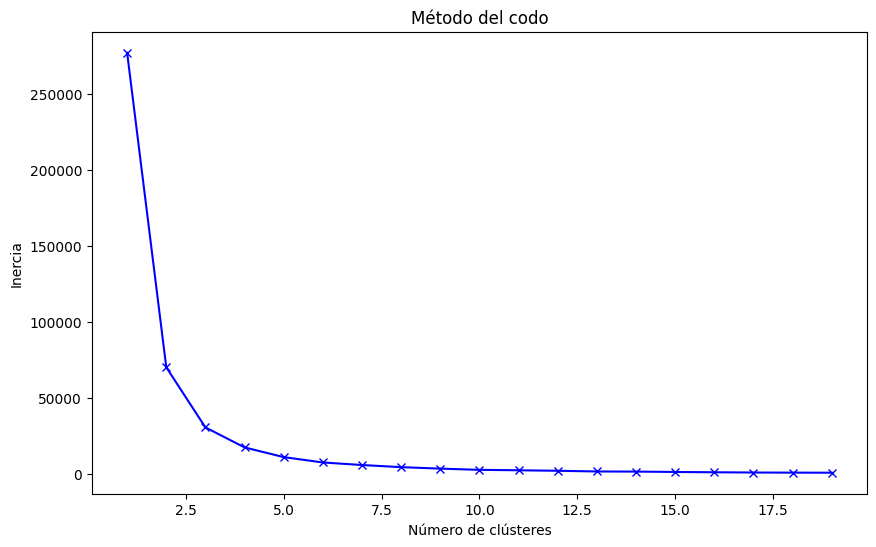

In [11]:
plt.figure(figsize=[10,6]) # Crear la figura para dibujar el gr√°fico
plt.title('M√©todo del codo') # A√±adir t√≠tulo al gr√°fico
plt.xlabel('N√∫mero de cl√∫steres') # Establecer la etiqueta para el eje x
plt.ylabel('Inercia') # Establecer etiquea para el eje y
plt.plot(K_range, inercia, 'bx-') # K_range son los n√∫meros de cl√∫steres probados
plt.show()

#  Selecci√≥n del valor de K  

Al analizar la gr√°fica del **m√©todo del codo**, se observa que el ‚Äúcodo‚Äù se encuentra entre los valores de **2.5 y 5**.  
Por tanto, se elige **K = 3** como el n√∫mero √≥ptimo de cl√∫steres para el dataset Iris.  

---

#  Aplicaci√≥n del Algoritmo K-Means  

Definido el valor de **K**, ya se puede aplicar el algoritmo de agrupamiento con el siguiente c√≥digo:  

```python
from sklearn.cluster import KMeans

# Definir el modelo K-Means con K=3
algoritmo = KMeans(
    n_clusters=3,       # n√∫mero de cl√∫steres
    init='k-means++',   # inicializaci√≥n de centroides
    max_iter=300,       # n√∫mero m√°ximo de iteraciones
    n_init=10,          # n√∫mero de veces que se ejecutar√° con diferentes centroides
    random_state=42     # semilla para reproducibilidad
)


In [12]:
algoritmo=KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=42)
algoritmo.fit(X) # Definido el algoritmo y sus parametros se entrena junto con los datos de variable X

KMeans(n_clusters=3, n_init=10, random_state=42)

#  Resultados del algoritmo K-Means  

Una vez entrenado el algoritmo, se deben revisar dos resultados importantes:  

1. **Centroides**  
   - Son los puntos centrales de cada cl√∫ster.  
   - Representan la media de las caracter√≠sticas de todas las observaciones que pertenecen a ese grupo.  

2. **Etiquetas**  
   - Indican a qu√© cl√∫ster pertenece cada flor del dataset.  
   - Son simplemente identificadores (0, 1, 2) que asigna el modelo.  

---

## En Python  

```python
# Obtener los centroides
centroides = algoritmo.cluster_centers_
print("Centroides de los cl√∫steres:")
print(centroides)

# Obtener las etiquetas asignadas a cada observaci√≥n
etiquetas = algoritmo.labels_
print("\nEtiquetas de cada instancia:")
print(etiquetas)


In [13]:
# Obtener los centroides
centroides = algoritmo.cluster_centers_
print("Centroides de los cl√∫steres:")
print(centroides)

# Obtener las etiquetas asignadas a cada observaci√≥n
etiquetas = algoritmo.labels_
print("\nEtiquetas de cada instancia:")
print(etiquetas)

Centroides de los cl√∫steres:
[[ 75.97959184   5.92653061   2.76122449   4.25510204]
 [125.59183673   6.58163265   2.96938776   5.54897959]
 [ 25.3877551    5.01020408   3.4244898    1.46122449]]

Etiquetas de cada instancia:
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


# Segmentaci√≥n de conjuntos de datos por atributos compartidos  

Una de las principales aplicaciones del **aprendizaje no supervisado** es la **segmentaci√≥n de datasets**.  
- Cada **cl√∫ster** formado es **mutuamente excluyente** y se conoce como un **segmento**.  
- La t√©cnica de agrupar observaciones en segmentos se denomina **segmentaci√≥n**.  

En el √°mbito empresarial, la segmentaci√≥n permite identificar **diferentes preferencias de los clientes**, lo cual es clave para implementar estrategias de **mercadeo m√°s efectivas** de productos y servicios.  

---

## Aplicaciones de la segmentaci√≥n o Clustering  

- üõí **Identificaci√≥n de patrones de compra** y generaci√≥n de recomendaciones (ej. pel√≠culas o series en plataformas de streaming).  
- üí≥ **Detecci√≥n de fraudes bancarios**.  
- ‚ö†Ô∏è **Detecci√≥n de at√≠picos** o datos an√≥malos.  
- üõ°Ô∏è **Evaluaci√≥n de riesgos de seguros**.  
- üßë‚Äç‚öïÔ∏è **An√°lisis del comportamiento de los pacientes** en el sector salud.  
- üìÇ **Clasificaci√≥n de documentos** en grandes repositorios.  
- üß¨ **Identificaci√≥n de s√≠ntomas** en estudios m√©dicos o biol√≥gicos.  

---

**Conclusi√≥n:** la segmentaci√≥n mediante clustering es una herramienta que permite **descubrir patrones ocultos** en los datos y tomar decisiones estrat√©gicas en distintos √°mbitos.  


# Visualizaci√≥n de Cl√∫steres (S√©palos)  

En el caso del ejemplo propuesto, es conveniente **graficar los datos obtenidos en cl√∫steres** para interpretar los resultados del algoritmo.  
A continuaci√≥n, se muestra el c√≥digo que utiliza las variables **longitud del s√©palo** y **ancho del s√©palo**:  






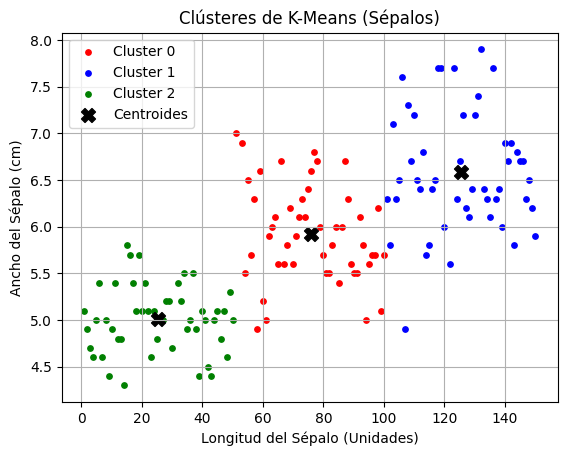

In [21]:
# Graficar los cl√∫steres
plt.scatter(
    X[etiquetas==0,0],
    X[etiquetas==0,1],
    s=15,
    c='red',
    label='Cluster 0'
)
plt.scatter(
    X[etiquetas==1, 0],
    X[etiquetas==1,1],
    s=15,
    c='blue',
    label='Cluster 1'
)
plt.scatter(
    X[etiquetas==2, 0],
    X[etiquetas==2,1],
    s=15,
    c='green',
    label='Cluster 2'
)

# Graficar los centroides
plt.scatter(
    centroides[:, 0],
    centroides[:, 1],
    s=100,
    c='black',
    marker='X',
    label='Centroides'
)

plt.title("Cl√∫steres de K-Means (S√©palos)")
plt.xlabel("Longitud del S√©palo (Unidades)")
plt.ylabel("Ancho del S√©palo (cm)")
plt.legend()
plt.grid(True)
plt.show()


# Herramientas tecnol√≥gicas para el agrupamiento de datos

Todos los algoritmos de agrupaci√≥n de observaciones buscan el mismo objetivo: **identificar cl√∫steres basados en patrones ocultos en los datos**.  
Los puntos en el mismo cl√∫ster tienen caracter√≠sticas similares, mientras que aquellos con diferencias relevantes se agrupan en cl√∫steres distintos.  

Algunos algoritmos de *clustering* m√°s utilizados son:

### üîπ Algoritmos de Clustering
Identifican grupos que se forman naturalmente, como **K-Means**, que se basa en la identificaci√≥n de centroides en el espacio de dos o tres dimensiones.

### üîπ An√°lisis de Componentes Principales (PCA)
Reduce la informaci√≥n de m√∫ltiples variables en algunos componentes principales, facilitando la b√∫squeda de patrones cuando existen muchos predictores.

### üîπ Descomposici√≥n en Valores Singulares (SVD)
T√©cnica de reducci√≥n de dimensiones semejante al PCA, ampliamente utilizada en sistemas de recomendaci√≥n.

### üîπ DBSCAN
(*Density Based Spatial Clustering of Applications with Noise*).  
Algoritmo basado en densidades que tambi√©n identifica **valores at√≠picos** al detectar observaciones que no cumplen con una densidad m√≠nima.

### üîπ Agrupamiento Jer√°rquico
Fusiona pares de cl√∫steres hasta obtener un √∫nico cl√∫ster que contiene todos los datos. Sus resultados suelen representarse en un √°rbol llamado **dendograma**.

---

En Python, la librer√≠a **scikit-learn** facilita la implementaci√≥n de estos algoritmos.  
Por ejemplo, el uso de **K-Means** puede realizarse de la siguiente manera:




In [23]:
from sklearn.cluster import KMeans

km = KMeans(
    n_clusters=3, init='random',
    n_init=10, max_iter=300,
    tol=1e-04, random_state=0
)

y_km = km.fit_predict(X)


## Par√°metros principales en `KMeans`

En el c√≥digo fuente, la funci√≥n **KMeans** recibe varios par√°metros de entrada importantes:

- **`n_clusters`**:  
  N√∫mero de cl√∫steres deseados.  
  Generalmente se obtiene con m√©todos como el **m√©todo del codo (Elbow Method)**.

- **`n_init`**:  
  N√∫mero de veces que el algoritmo se ejecutar√° de forma independiente con diferentes centroides aleatorios.  
  Se selecciona el modelo final con el **menor error**.

- **`max_iter`**:  
  M√°ximo n√∫mero de iteraciones permitidas en cada ejecuci√≥n √∫nica.

---

 **Nota:**  
El algoritmo se detiene autom√°ticamente cuando los **centroides dejan de cambiar**, aunque no se haya alcanzado el n√∫mero m√°ximo de iteraciones.


## Otras t√©cnicas de clusterizaci√≥n

Adem√°s de **K-Means tradicional**, existen otros enfoques y variantes para mejorar la calidad del agrupamiento:

- **Gr√°ficos Silhouette (Silueta)**   
  M√©todo utilizado para evaluar la calidad de un agrupamiento y seleccionar el valor √≥ptimo de **K**.  
  Un valor cercano a **1** indica que los objetos est√°n bien asignados a su cl√∫ster, mientras que valores cercanos a **0** o negativos sugieren solapamiento o mala asignaci√≥n.

- **K-Means++**  
  Variante de K-Means que mejora el rendimiento mediante una inicializaci√≥n m√°s inteligente de los **centroides**, lo que reduce la probabilidad de obtener malas soluciones locales.

- **Cl√∫ster Jer√°rquicos**   
  T√©cnica que agrupa datos de manera jer√°rquica formando un √°rbol llamado **dendrograma**.  
  Se utiliza para descubrir relaciones entre datos sin necesidad de especificar de antemano el n√∫mero de cl√∫steres ni asumir estructuras esf√©ricas.


## TensorFlow: una librer√≠a clave para IA y aprendizaje autom√°tico

**TensorFlow** es una de las librer√≠as m√°s importantes en el campo de la **inteligencia artificial (IA)** y el **aprendizaje autom√°tico (Machine Learning)**.  

-  Fue desarrollada y liberada por **Google**.  
- Permite realizar c√°lculos num√©ricos complejos de manera eficiente.  
-  Contiene herramientas para construir y entrenar **redes neuronales** y otros modelos de IA.  
- Funciona en m√∫ltiples plataformas y lenguajes, siendo **Python** el m√°s utilizado.  

Su flexibilidad y escalabilidad la convierten en una herramienta fundamental tanto para la investigaci√≥n como para aplicaciones en la industria.


## Validaci√≥n del resultado del an√°lisis

Al usar **algoritmos de machine learning**, ya sean supervisados o no supervisados, lo m√°s importante es la **interpretaci√≥n de los resultados**.  

En el caso de la **clusterizaci√≥n con K-Means**, se debe verificar si los cl√∫steres encontrados tienen sentido l√≥gico y cumplen con los objetivos del an√°lisis.  

-  Si un cl√∫ster tiene muy pocos o demasiados datos, lo m√°s responsable es **repetir el an√°lisis** con una mejor inicializaci√≥n de centroides u otro valor de **K**.  
- Una variable clave es la **distancia eucl√≠dea** entre cada punto y su centroide:  
  - Sus promedios deben tener una **variabilidad moderada**.  
  - Si no se cumple, se recomienda repetir el proceso.  
- Tambi√©n es importante medir qu√© tan separados est√°n los cl√∫steres entre s√≠.  

---

### Medidas importantes en la validaci√≥n de cl√∫steres

- **Cohesi√≥n**   
  Distancia promedio del centroide a todos los puntos dentro del mismo cl√∫ster.  
  Una baja cohesi√≥n indica que los puntos est√°n muy dispersos.

- **Separaci√≥n**   
  Distancia promedio entre un centroide y los centroides de otros cl√∫steres.  
  Una buena separaci√≥n significa que los cl√∫steres est√°n bien diferenciados.

---

Para finalizar el proceso, se deben usar las **muestras separadas inicialmente** y observar:  
1. A qu√© cl√∫ster pertenecen.  
2. Los resultados preliminares que predice el algoritmo.  

En este caso, se retoma la prueba original consistente en **tres observaciones**.


## Predicci√≥n y ubicaci√≥n de nuevas muestras en los cl√∫steres

En este punto, se toman algunas **muestras de prueba** y se predice a qu√© cl√∫ster pertenecen:

```python
# Selecci√≥n de columnas relevantes (longitudes y anchos de s√©palos y p√©talos)
Xmuestras = muestras.iloc[:, [0, 1, 2, 3]].values  

# Predicci√≥n de los cl√∫steres a los que pertenecen las muestras
YMuestraPrediccion = algoritmo.predict(Xmuestras)

print(YMuestraPrediccion)


In [24]:
Xmuestras = muestras.iloc[:, [0, 1, 2, 3]].values
YMuestraPrediccion = algoritmo.predict(Xmuestras)
print(YMuestraPrediccion)

[2 2 2]


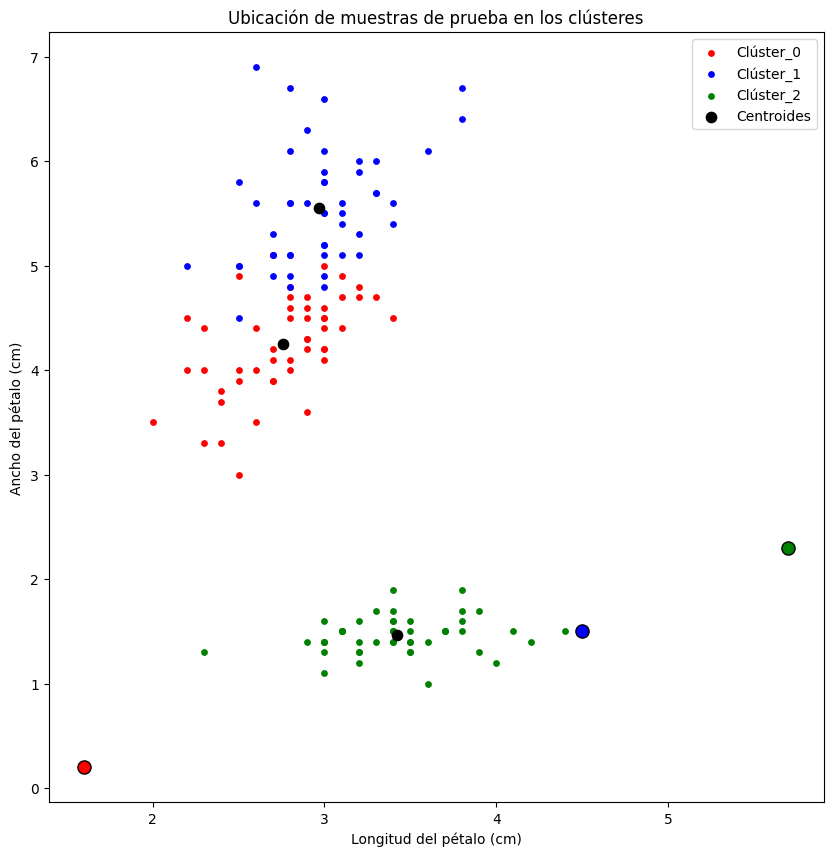

In [25]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=[10, 10])

# Graficar cl√∫steres
plt.scatter(X[etiquetas == 0, 2], X[etiquetas == 0, 3], s=15, c='red', label='Cl√∫ster_0')
plt.scatter(X[etiquetas == 1, 2], X[etiquetas == 1, 3], s=15, c='blue', label='Cl√∫ster_1')
plt.scatter(X[etiquetas == 2, 2], X[etiquetas == 2, 3], s=15, c='green', label='Cl√∫ster_2')

# Graficar centroides
plt.scatter(centroides[:, 2], centroides[:, 3], s=55, c='black', label='Centroides')

# Dibujar las muestras iniciales
plt.scatter(Xmuestras[0, 2], Xmuestras[0, 3], s=90, c='red', edgecolors='black')
plt.scatter(Xmuestras[1, 2], Xmuestras[1, 3], s=90, c='blue', edgecolors='black')
plt.scatter(Xmuestras[2, 2], Xmuestras[2, 3], s=90, c='green', edgecolors='black')

plt.legend()
plt.title("Ubicaci√≥n de muestras de prueba en los cl√∫steres")
plt.xlabel("Longitud del p√©talo (cm)")
plt.ylabel("Ancho del p√©talo (cm)")
plt.show()
